In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [114]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)

In [374]:
print([np.sum(tX[:,i]==-999) for i in range(tX.shape[1])])

[38114, 0, 0, 0, 177457, 177457, 177457, 0, 0, 0, 0, 0, 177457, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 99913, 99913, 99913, 177457, 177457, 177457, 0]


In [8]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

## Do your thing crazy machine learning thing here :) ...

In [9]:
ratio = 0.8
seed = 6
tx_training, tx_testing, y_training, y_testing = split_data(tX, y, ratio, seed)

In [10]:
tx_training = np.delete(tx_training, (4,5,6,12,26,27,28), axis=1)
tx_training, col_median_tX = correction_missing_values(tx_training)
#print([(np.max(tX[:,i]),np.min(tX[:,i]),np.mean(tX[:,i]),np.median(tX[:,i])) for i in range(tX.shape[1])])
#plt.boxplot(tx_training)
tx_training, perc_25, perc_75, col_median_tX = remove_outliers(tx_training)
#tx_training, max_, min_ = normalize(tx_training)
tx_training, mean, std = standardize(tx_training)

In [11]:
tx_testing = np.delete(tx_testing, (4,5,6,12,26,27,28), axis=1)
tx_testing = correction_missing_values_test(tx_testing, col_median_tX)
tx_testing = remove_outliers_test(tx_testing, perc_25, perc_75, col_median_tX)
#tx_testing = (tx_testing - min_) / (max_ - min_)
tx_testing = (tx_testing - mean) / std

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf_logistic = LogisticRegression(random_state=0).fit(tx_training, y_training)
clf_SVC = SVC(gamma='auto').fit(tx_training, y_training)
print("Accuracy from scikit learn - logistic regression: "+str(round(100*clf_logistic.score(tx_training, y_training),5))+' %\n')
print("Accuracy from scikit learn - Support Vector Machine: "+str(round(100*clf_SVC.score(tx_training, y_training),5))+' %\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy from scikit learn - logistic regression: 78.85 %

Accuracy from scikit learn - Support Vector Machine: 96.25 %



In [44]:
from logistic_regression import *
#Using our code
#Logistic regression

gamma = 0.0001
n_iter = 85

tx_training = np.c_[np.ones((y_training.shape[0], 1)), tx_training]
tx_testing = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing]

w = np.random.rand(tx_training.shape[1])

for i in range(n_iter):
    w, loss = learning_by_gradient_descent(y_training, tx_training, w, gamma)
    if i % 10 == 0:
        print("Current iteration={iter}, training loss={l_tr}, testing loss={l_te}".format(iter=i, l_tr=loss, 
                                                                                                         l_te=calculate_loss(y_testing, tx_testing, w)))
print(w, loss)
print("training loss={l_tr}".format(l_tr=calculate_loss(y_training, tx_training, w)))
print("testing loss={l_te}".format(l_te=calculate_loss(y_testing, tx_testing, w)))

print("Accuracy from our code:\n")
print("Logistic regression: "+str(round(100*np.sum(predict_labels(w, tx_testing, True)==y_testing)/len(y_testing),5))+" %\n")

Current iteration=0, training loss=5521.413283753469, testing loss=1260.454865442583
Current iteration=10, training loss=2831.4255880359387, testing loss=687.4562267101987
Current iteration=20, training loss=2204.258403944562, testing loss=563.861775675578
Current iteration=30, training loss=2019.4559514421726, testing loss=529.3800951470937
Current iteration=40, training loss=1947.8456766483139, testing loss=517.0578460250651
Current iteration=50, training loss=1915.3428246331996, testing loss=512.0994962269394
Current iteration=60, training loss=1898.8732012918622, testing loss=510.01874568679307
Current iteration=70, training loss=1889.8459935832577, testing loss=509.1796589371522
Current iteration=80, training loss=1884.6050025078605, testing loss=508.9050868244675
[-0.88740606  1.01985769 -0.68726902 -0.09986496 -0.1851694   0.06088645
 -0.10154572 -0.03415832 -0.30745994  0.37593095  0.18073761 -0.01015003
  0.03778521  0.04551408 -0.07930566  0.0932264  -0.06457739  0.01397209
 

In [45]:
y_pred = predict_labels(w, tx_testing, True)
print(len(y_pred))
print(np.sum([y_pred==1]))
print(np.sum([y_testing==1]))

1000
284
338


In [46]:
#test on all data points from train.csv
y_, tX_, ids_ = load_csv_data('../data/train.csv', sub_sample=False)

In [47]:
tX_ = np.delete(tX_, (4,5,6,12,26,27,28), axis=1)
tX_ = correction_missing_values_test(tX_, col_median_tX)
tX_ = remove_outliers_test(tX_, perc_25, perc_75, col_median_tX)
tX_ = (tX_ - min_) / (max_ - min_)
tX_ = (tX_ - mean) / std
tX_ = np.c_[np.ones((tX_.shape[0], 1)), tX_]

In [48]:
y_pred = predict_labels(w, tX_, True)
print(np.sum([y_pred==1]))
print(np.sum([y_==1]))
print("Logistic regression: "+str(round(100*np.sum(y_pred==y_)/len(y_),5))+" %\n")

71472
85667
Logistic regression: 77.5292 %



In [100]:
from reg_logistic_regression import *
#Reguralized logistic regression

gamma = 0.0001
lamda_ = 0.105
n_iter = 90

tx_training = np.c_[np.ones((y_training.shape[0], 1)), tx_training]
tx_testing = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing]

w_reg = np.random.rand(tx_training.shape[1])
for i in range(n_iter):
    w_reg, loss = learning_by_penalized_gradient(y_training, tx_training, w_reg, gamma, lamda_)
    if i % 10 == 0:
        print("Current iteration={iter}, training loss={l_tr}, testing loss={l_te}".format(iter=i, l_tr=loss, 
                                                                                                         l_te=calculate_loss(y_testing, tx_testing, w_reg)))
print(w_reg, loss)
print("training loss={l_tr}".format(l_tr=calculate_loss(y_training, tx_training, w_reg)))
print("testing loss={l_te}".format(l_te=calculate_loss(y_testing, tx_testing, w_reg)))

print("After regularization: "+str(round(100*np.sum(predict_labels(w_reg, tx_testing, True)==y_testing)/len(y_testing),5))+" %\n")

Current iteration=0, training loss=5522.318831095153, testing loss=1260.4333781867192
Current iteration=10, training loss=2831.5040238577826, testing loss=687.3783248511893
Current iteration=20, training loss=2204.334581461228, testing loss=563.8113249033254
Current iteration=30, training loss=2019.5940856386665, testing loss=529.3483253001523
Current iteration=40, training loss=1948.0357998134643, testing loss=517.0361769260752
Current iteration=50, training loss=1915.5701962888809, testing loss=512.0828977498253
Current iteration=60, training loss=1899.1268346255213, testing loss=510.0044088618023
Current iteration=70, training loss=1890.118269395124, testing loss=509.16597625588525
Current iteration=80, training loss=1884.8906396331927, testing loss=508.8911341349611
[-0.8892887   1.02793143 -0.70016142 -0.10307377 -0.18741807  0.05434073
 -0.0966743  -0.03384179 -0.30361892  0.36787893  0.17993639 -0.01237023
  0.03351597  0.04774421 -0.07715804  0.08822358 -0.06233701  0.01085407


In [101]:
y_pred = predict_labels(w_reg, tx_testing, True)
print(len(y_pred))
print(np.sum([y_pred==1]))
print(np.sum([y_testing==1]))

In [103]:
#test on all data points from train.csv
y_, tX_, ids_ = load_csv_data('../data/train.csv', sub_sample=False)

In [104]:
tX_ = np.delete(tX_, (4,5,6,12,26,27,28), axis=1)
tX_ = correction_missing_values_test(tX_, col_median_tX)
tX_ = remove_outliers_test(tX_, perc_25, perc_75, col_median_tX)
tX_ = (tX_ - min_) / (max_ - min_)
tX_ = (tX_ - mean) / std
tX_ = np.c_[np.ones((tX_.shape[0], 1)), tX_]

In [105]:
y_pred = predict_labels(w_reg, tX_, True)
print(np.sum([y_pred==1]))
print(np.sum([y_==1]))
print("Regularized logistic regression: "+str(round(100*np.sum(y_pred==y_)/len(y_),5))+" %\n")

71468
85667
Regularized logistic regression: 77.554 %



In [24]:
from grid_search import *
# optimising the lambda for regularized logistic regression 

gamma = 0.0001
n_iter = 10000
ratio = 0.8
seed = 6
n_intervals = 20

tX = np.c_[np.ones((y.shape[0], 1)), tX]

tx_training, tx_testing, y_training, y_testing = split_data(tX, y, ratio, seed)

w_reg = np.random.rand(tX.shape[1])

lambdas = generate_lambda(n_intervals)
min_loss, best_lambda = grid_search(y_training, y_testing, tx_training, tx_testing, w_reg, lambdas, gamma, n_iter)

In [ ]:
print("The optimum lambda is : " + str(best_lambda))
print("The corresponding loss is : " + str(min_loss))

In [487]:
from least_squares import *
#least squares

#try polynomial
degree = 3
tx_training = build_poly(tx_training, degree)
tx_training = np.c_[np.ones((y_training.shape[0], 1)), tx_training]
tx_testing = build_poly(tx_testing, degree)
tx_testing = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing]

w_lsq, loss = least_squares(y_training, tx_training)
print("weights={w}, loss={l}".format(w=w_lsq, l=loss))
print("training loss={l_tr}".format(l_tr=compute_loss(y_training, tx_training, w_lsq)))
print("testing loss={l_te}".format(l_te=compute_loss(y_testing, tx_testing, w_lsq)))
print("After least squares: "+str(round(100*np.sum(predict_labels(w_lsq, tx_testing, False)==y_testing)/len(y_testing),5))+" %\n")

weights=[ 3.66598441e-01  2.09398782e-01 -3.05068879e-03 -1.99818081e-02
 -1.83384785e-01 -2.66200489e-02  3.07285822e-02  4.52252769e-02
 -4.47537037e-02 -3.10521859e-03 -5.95299805e-02 -3.76918551e-03
  7.79476558e-03 -2.41872499e-02 -1.72349806e-02 -2.32072324e-04
 -1.85236296e-02  2.80616785e-02 -4.32533197e-03  5.53024378e-03
  4.05712481e-03 -3.72715217e-03 -2.29538811e-02  9.83291248e-03
 -5.47150075e-04  5.86382336e-02  3.54795335e-02 -1.12674819e-02
  5.87072500e-02 -3.34374623e-03 -2.06295721e-03 -4.72162526e-03
 -1.72343279e-02 -4.89215164e-04  7.56382855e-03 -8.47417844e-03
 -2.58754396e-03 -2.59801853e-02  2.87535229e-03  4.10879532e-04
  2.79087785e-03 -3.04015839e-02 -4.17405857e-03  1.79978944e-02
 -6.36495793e-03 -2.52412325e-03  3.76673750e-03  8.94330230e-03
 -1.46389377e-03  3.42666271e-02  1.50008577e-03 -1.81931039e-02
  3.50202375e-04 -6.25274602e-03  9.15348524e-04  7.63380754e-02
  2.34957727e-02 -3.80639468e-02  2.57594706e-02 -1.55082641e-02
  3.98318897e-03 

In [488]:
y_pred = predict_labels(w_lsq, tx_testing, False)
print(len(y_pred))
print(np.sum([y_pred==1]))
print(np.sum([y_testing==1]))

1000
287
338


In [489]:
#test on all data points from train.csv
y_, tX_, ids_ = load_csv_data('../data/train.csv', sub_sample=False)

In [490]:
tX_ = np.delete(tX_, (4,5,6,12,26,27,28), axis=1)
tX_ = correction_missing_values_test(tX_, col_median_tX)
tX_ = remove_outliers_test(tX_, perc_25, perc_75, col_median_tX)
#tX_ = (tX_ - min_) / (max_ - min_)
tX_ = (tX_ - mean) / std
tX_ = build_poly(tX_, degree)
tX_ = np.c_[np.ones((tX_.shape[0], 1)), tX_]

In [491]:
y_pred = predict_labels(w_lsq, tX_, False)
print(np.sum([y_pred==1]))
print(np.sum([y_==1]))
print("Least squares: "+str(round(100*np.sum(y_pred==y_)/len(y_),5))+" %\n")

75823
85667
Least squares: 80.3456 %



In [129]:
#choosing polynomial degree
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 2, 3, 4, 5, 6, 7, 8]

    for ind, degree in enumerate(degrees):
        tx_training_ = build_poly(tx_training, degree)
        tx_training_ = np.c_[np.ones((y_training.shape[0], 1)), tx_training_]
        tx_testing_ = build_poly(tx_testing, degree)
        tx_testing_ = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing_]

        weights, mse = least_squares(y_training, tx_training_)
        print("training loss={l_tr}".format(l_tr=compute_loss(y_training, tx_training_, weights)))
        print("testing loss={l_te}".format(l_te=compute_loss(y_testing, tx_testing_, weights)))
        rmse = np.sqrt(2 * mse)

        print("Processing {i}th experiment, degree={d}, training rmse={tr_loss}, testing rmse={te_loss}".format(
              i=ind + 1, d=degree, tr_loss=rmse, te_loss=compute_loss(y_testing, tx_testing_, weights)))
        
polynomial_regression()

training loss=0.07906238228549702
testing loss=0.08644314556672941
Processing 1th experiment, degree=1, training rmse=0.3976490469886656, testing rmse=0.08644314556672941
training loss=0.07257482112180884
testing loss=0.08039932152981177
Processing 2th experiment, degree=2, training rmse=0.380985094516331, testing rmse=0.08039932152981177
training loss=0.0697153219398077
testing loss=0.07828847199031279
Processing 3th experiment, degree=3, training rmse=0.3734041294356764, testing rmse=0.07828847199031279
training loss=0.06881541109575426
testing loss=0.07782891476206491
Processing 4th experiment, degree=4, training rmse=0.3709862830233869, testing rmse=0.07782891476206491
training loss=30.954725931273213
testing loss=34.610948733122264
Processing 5th experiment, degree=5, training rmse=7.8682559606653895, testing rmse=34.610948733122264
training loss=5.199442406434914
testing loss=5.231264891349185
Processing 6th experiment, degree=6, training rmse=3.2247301922594747, testing rmse=5.2

In [172]:
def cross_validation_least_squares(y, x, k_indices, k, degree):
    # get k'th subgroup in test, others in train: TODO
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]

    tr_indice = tr_indice.reshape(-1)

    y_testing = y[te_indice]
    y_training = y[tr_indice]
    tx_testing = tX[te_indice]
    tx_training = tX[tr_indice]

    tx_training = np.delete(tx_training, (4,5,6,12,26,27,28), axis=1)
    tx_training, col_median_tX = correction_missing_values(tx_training)
    tx_training, perc_25, perc_75, col_median_tX = remove_outliers(tx_training)
    tx_training, max_, min_ = normalize(tx_training)
    tx_training, mean, std = standardize(tx_training)
    
    tx_testing = np.delete(tx_testing, (4,5,6,12,26,27,28), axis=1)
    tx_testing = correction_missing_values_test(tx_testing, col_median_tX)
    tx_testing = remove_outliers_test(tx_testing, perc_25, perc_75, col_median_tX)
    tx_testing = (tx_testing - min_) / (max_ - min_)
    tx_testing = (tx_testing - mean) / std
    
    tx_training_ = build_poly(tx_training, degree)
    tx_training_ = np.c_[np.ones((y_training.shape[0], 1)), tx_training_]
    tx_testing_ = build_poly(tx_testing, degree)
    tx_testing_ = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing_]

    w_lsq, loss = least_squares(y_training, tx_training_)

    loss_tr = np.sqrt(2 * compute_loss(y_training, tx_training_, w_lsq))
    loss_te = np.sqrt(2 * compute_loss(y_testing, tx_testing_, w_lsq))

    return loss_tr, loss_te, w_lsq

(3, 0.3878334931510904)

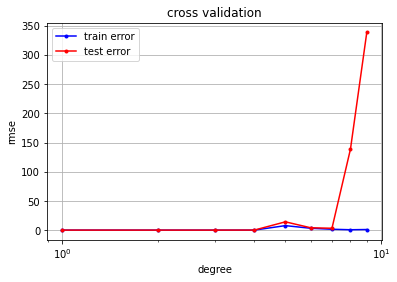

In [177]:
def best_degree_selection_least_squares(degrees, k_fold, seed = 1):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    
    rmse_tr = []
    rmse_te = []
    #vary degree
    for degree in degrees:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te, _ = cross_validation_least_squares(y, tX, k_indices, k, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    x_label = 'degree'
    cross_validation_visualization(degrees, x_label, rmse_tr, rmse_te)
    
    ind_best_degree = np.argmin(rmse_te)
    return degrees[ind_best_degree], rmse_te[ind_best_degree]

best_degree_selection_least_squares(np.arange(1,11), 4)

In [1]:
#from ridge_regression import *
#ridge regression

#degree = 2
#tx_training = build_poly(tx_training, degree)
#tx_training = np.c_[np.ones((y_training.shape[0], 1)), tx_training]
#tx_testing = build_poly(tx_testing, degree)
#tx_testing = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing]

#lambdas = np.logspace(-10, -2, 50)
#for ind, lambda_ in enumerate(lambdas):
    # ridge regression with a given lambda
    #w_ridge, loss = ridge_regression(y_training, tx_training, lambda_)
    #print("lambda={lam}, training rmse={l_tr}, testing rmse={l_te}".format(lam=lambda_, l_tr=np.sqrt(2*loss), 
                                                                                       #l_te=np.sqrt(2*compute_loss(y_testing, tx_testing, w_ridge))))
    
#print("weights={w}, loss={l}".format(w=w_ridge, l=loss))
#print("training loss={l_tr}".format(l_tr=compute_loss(y_training, tx_training, w_ridge)))
#print("testing loss={l_te}".format(l_te=compute_loss(y_testing, tx_testing, w_ridge)))

#print("After ridge regression: "+str(round(100*np.sum(predict_labels(w_ridge, tx_testing, False)==y_testing)/len(y_testing),5))+" %\n")

In [ ]:
#lambda=2.329951810515372e-10, training rmse=0.37002483837927225, testing rmse=0.39364374050304274

In [180]:
from ridge_regression import *
def cross_validation_ridge_regression(y, x, k_indices, k, lambda_, degree):
    # get k'th subgroup in test, others in train: TODO
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]

    tr_indice = tr_indice.reshape(-1)

    y_testing = y[te_indice]
    y_training = y[tr_indice]
    tx_testing = tX[te_indice]
    tx_training = tX[tr_indice]

    tx_training = np.delete(tx_training, (4,5,6,12,26,27,28), axis=1)
    tx_training, col_median_tX = correction_missing_values(tx_training)
    tx_training, perc_25, perc_75, col_median_tX = remove_outliers(tx_training)
    tx_training, max_, min_ = normalize(tx_training)
    tx_training, mean, std = standardize(tx_training)
    
    tx_testing = np.delete(tx_testing, (4,5,6,12,26,27,28), axis=1)
    tx_testing = correction_missing_values_test(tx_testing, col_median_tX)
    tx_testing = remove_outliers_test(tx_testing, perc_25, perc_75, col_median_tX)
    tx_testing = (tx_testing - min_) / (max_ - min_)
    tx_testing = (tx_testing - mean) / std
    
    tx_training_ = build_poly(tx_training, degree)
    tx_training_ = np.c_[np.ones((y_training.shape[0], 1)), tx_training_]
    tx_testing_ = build_poly(tx_testing, degree)
    tx_testing_ = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing_]

    w_ridge, _ = ridge_regression(y_training, tx_training_, lambda_)

    loss_tr = np.sqrt(2 * compute_loss(y_training, tx_training_, w_ridge))
    loss_te = np.sqrt(2 * compute_loss(y_testing, tx_testing_, w_ridge))

    return loss_tr, loss_te, w_ridge

In [208]:
def best_degree_selection_ridge_regression(degrees, lambdas, k_fold, seed = 1):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    
    #for each degree, we compute the best lambdas and the associated rmse
    best_lambdas = []
    best_rmses = []
    #vary degree
    for degree in degrees:
        # cross validation
        rmse_te = []
        for lambda_ in lambdas:
            rmse_te_tmp = []
            for k in range(k_fold):
                _, loss_te, _ = cross_validation_ridge_regression(y, tX, k_indices, k, lambda_, degree)
                rmse_te_tmp.append(loss_te)
            rmse_te.append(np.mean(rmse_te_tmp))
        
        ind_lambda_opt = np.argmin(rmse_te)
        best_lambdas.append(lambdas[ind_lambda_opt])
        best_rmses.append(rmse_te[ind_lambda_opt])
        
    ind_best_degree =  np.argmin(best_rmses)
        
    return degrees[ind_best_degree], best_rmses[ind_best_degree], best_lambdas[ind_best_degree]

best_degree_selection_ridge_regression(np.arange(1,11), np.logspace(-10, -2, 30), 4)

(4, 0.3827734675914003, 6.723357536499335e-10)

(2.329951810515372e-10, 0.3827733968108855)

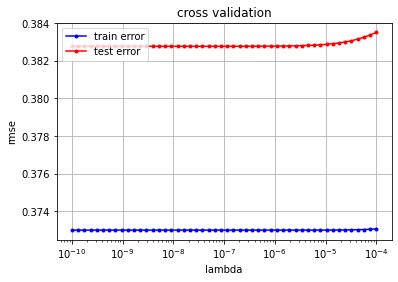

In [210]:
def best_lambda_selection_ridge_regression(degree, lambdas, k_fold, seed = 1):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation: TODO
    for lambda_ in lambdas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te, _ = cross_validation_ridge_regression(y, tX, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    x_label = 'lambda'
    cross_validation_visualization(lambdas, x_label, rmse_tr, rmse_te)
    ind_best_lambda = np.argmin(rmse_te)
    return lambdas[ind_best_lambda], rmse_te[ind_best_lambda]

best_lambda_selection_ridge_regression(4, np.logspace(-10, -4, 50), 4)

In [9]:
from ridge_regression import *
#ridge regression

degree = 4
tx_training = build_poly(tx_training, degree)
tx_training = np.c_[np.ones((y_training.shape[0], 1)), tx_training]
tx_testing = build_poly(tx_testing, degree)
tx_testing = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing]

#w_ridge, loss = ridge_regression(y_training, tx_training, 0.0012067926406393288)
w_ridge, loss = ridge_regression(y_training, tx_training, 2.329951810515372e-10)
print("weights={w}, loss={l}".format(w=w_ridge, l=loss))
print("training loss={l_tr}".format(l_tr=compute_loss(y_training, tx_training, w_ridge)))
print("testing loss={l_te}".format(l_te=compute_loss(y_testing, tx_testing, w_ridge)))
print("After ridge regression: "+str(round(100*np.sum(predict_labels(w_ridge, tx_testing, False)==y_testing)/len(y_testing),5))+" %\n")

weights=[ 2.97272641e-01  2.53159561e-01  3.95576693e-02 -4.10265667e-02
 -8.94857750e-03 -2.16164727e-01 -1.67991094e-02  5.62833322e-02
 -9.39519533e-03  6.24670655e-02 -6.69265434e-02 -1.03605106e-02
  4.86122888e-03 -5.38496462e-02 -1.84390100e-03  3.88211772e-03
  1.07214395e-03 -4.74537903e-03 -3.66453473e-02 -6.38351841e-03
  3.77370722e-03 -2.83579954e-02  8.64163497e-03  7.72484431e-03
 -1.51218304e-03  1.14560813e-02  1.80415565e-04 -5.67742710e-03
  1.06907215e-03 -3.64110833e-02  2.15273240e-02 -3.34954809e-03
  1.36209056e-04  6.56039580e-02  1.49318509e-01 -6.98864641e-03
 -7.86525197e-02  5.33045021e-02  1.76518719e-02 -1.43456980e-02
  1.55662070e-03 -3.82099424e-03 -1.59039827e-02 -6.81440388e-04
 -3.52938108e-04  4.05536656e-03  1.37950836e-02 -1.22384157e-03
 -7.31066217e-03 -1.21095098e-02  5.60115622e-03 -5.19500889e-03
  9.33688040e-04  4.97796708e-03 -1.78083169e-02 -5.39032950e-03
 -3.63483954e-03  1.72855545e-02  1.05118246e-02 -3.40856869e-03
 -5.78573564e-03 

In [10]:
y_pred = predict_labels(w_ridge, tx_testing, False)
print(len(y_pred))
print(np.sum([y_pred==1]))
print(np.sum([y_testing==1]))

In [12]:
#test on all data points from train.csv
y_, tX_, ids_ = load_csv_data('../data/train.csv', sub_sample=False)

(250000,)


In [13]:
tX_ = np.delete(tX_, (4,5,6,12,26,27,28), axis=1)
tX_ = correction_missing_values_test(tX_, col_median_tX)
tX_ = remove_outliers_test(tX_, perc_25, perc_75, col_median_tX)
#tX_ = (tX_ - min_) / (max_ - min_)
tX_ = (tX_ - mean) / std
tX_ = build_poly(tX_, degree)
tX_ = np.c_[np.ones((tX_.shape[0], 1)), tX_]

In [14]:
y_pred = predict_labels(w_ridge, tX_, False)
print(np.sum([y_pred==1]))
print(np.sum([y_==1]))
print("Ridge regression: "+str(round(100*np.sum(y_pred==y_)/len(y_),5))+" %\n")

74017
85667
Ridge regression: 80.4312 %



In [280]:
from gradient_descent import *

ratio = 0.8
seed = 6

tX = np.c_[np.ones((y.shape[0], 1)), tX]

tx_training, tx_testing, y_training, y_testing = split_data(tX, y, ratio, seed)

# Define the parameters of the algorithm.
max_iters = 5000
gamma = 0.1

# Initialization
w_initial = np.random.rand(tX.shape[1])

# Start gradient descent.
gradient_ws, gradient_losses= gradient_descent(y_training, tx_training, w_initial, max_iters, gamma)
print("weights={w}, training loss={l}".format(w=gradient_ws, l=gradient_losses))
print("testing loss={l_te}".format(l_te=compute_loss(y_testing, tx_testing, gradient_ws)))
print("After gradient descent: "+str(round(100*np.sum(predict_labels(gradient_ws, tx_testing, False)==y_testing)/len(y_testing),5))+" %\n")

In [12]:
from gradient_descent import *

degree = 3
tx_training = build_poly(tx_training, degree)
tx_training, mean_, std_ = standardize(tx_training)
tx_training = np.c_[np.ones((y_training.shape[0], 1)), tx_training]
tx_testing = build_poly(tx_testing, degree)
tx_testing = (tx_testing - mean_) / std_
tx_testing = np.c_[np.ones((y_testing.shape[0], 1)), tx_testing]

# Define the parameters of the algorithm.
max_iters = 20000
gamma = 0.25

# Initialization
w_initial = np.random.rand(tx_training.shape[1])

# Start gradient descent.
gradient_ws, gradient_losses= gradient_descent(y_training, tx_training, y_testing, tx_testing, w_initial, max_iters, gamma)
print("weights={w}, training loss={l}".format(w=gradient_ws, l=gradient_losses))
print("training loss={l_tr}".format(l_tr=compute_loss(y_training, tx_training, gradient_ws)))
print("testing loss={l_te}".format(l_te=compute_loss(y_testing, tx_testing, gradient_ws)))
print("After gradient descent: "+str(round(100*np.sum(predict_labels(gradient_ws, tx_testing, False)==y_testing)/len(y_testing),5))+" %\n")

Current iteration=0, training loss=26.950348424835816, testing loss=12.851884235183869
Current iteration=500, training loss=0.06984341421487937, testing loss=0.0783533954319692
Current iteration=1000, training loss=0.06974060763748247, testing loss=0.07835845842213904
Current iteration=1500, training loss=0.06973059243824471, testing loss=0.07836371245544836
Current iteration=2000, training loss=0.06972681840811316, testing loss=0.07835774279792841
Current iteration=2500, training loss=0.06972423221687665, testing loss=0.07834955658539292
Current iteration=3000, training loss=0.06972225203087797, testing loss=0.07834168913596307
Current iteration=3500, training loss=0.0697207141645145, testing loss=0.07833470773719328
Current iteration=4000, training loss=0.06971951777683436, testing loss=0.07832865028739691
Current iteration=4500, training loss=0.06971858685429363, testing loss=0.0783234247470055
Current iteration=5000, training loss=0.06971786247559236, testing loss=0.078318918659726

In [ ]:
y_pred = predict_labels(gradient_ws, tx_testing, False)
print(len(y_pred))
print(np.sum([y_pred==1]))
print(np.sum([y_testing==1]))

In [471]:
#test on all data points from train.csv
y_, tX_, ids_ = load_csv_data('../data/train.csv', sub_sample=False)

In [472]:
tX_ = np.delete(tX_, (4,5,6,12,26,27,28), axis=1)
tX_ = correction_missing_values_test(tX_, col_median_tX)
tX_ = remove_outliers_test(tX_, perc_25, perc_75, col_median_tX)
tX_ = (tX_ - min_) / (max_ - min_)
tX_ = (tX_ - mean) / std
tX_ = build_poly(tX_, degree)
tX_ = (tX_ - mean_) / std_
tX_ = np.c_[np.ones((tX_.shape[0], 1)), tX_]

In [473]:
y_pred = predict_labels(gradient_ws, tX_, False)
print(np.sum([y_pred==1]))
print(np.sum([y_==1]))
print("Gradient descent: "+str(round(100*np.sum(y_pred==y_)/len(y_),5))+" %\n")

75821
85667
Gradient descent: 80.3456 %



In [30]:
from stochastic_gradient_descent import *

ratio = 0.8
seed = 6

tX = np.c_[np.ones((y.shape[0], 1)), tX]

tx_training, tx_testing, y_training, y_testing = split_data(tX, y, ratio, seed)

# Define the parameters of the algorithm.
max_iters = 5000
gamma = 0.1

# Initialization
w_initial = np.random.rand(tX.shape[1])

# Start SGD.
sgd_ws, sgd_losses = stochastic_gradient_descent(y_training, tx_training, w_initial, max_iters, gamma)
print("weights={w}, training loss={l}".format(w=sgd_ws, l=sgd_losses))
print("training loss={l_tr}".format(l_tr=compute_loss(y_training, tx_training, sgd_ws)))
print("testing loss={l_te}".format(l_te=compute_loss(y_testing, tx_testing, sgd_ws)))
print("After stochastic gradient descent: "+str(round(100*np.sum(predict_labels(sgd_ws, tx_testing, False)==y_testing)/len(y_testing),5))+" %\n")

Current iteration=0, loss=10.684155249537138
Current iteration=100, loss=0.11611652153666797
Current iteration=200, loss=0.14554730629189477
Current iteration=300, loss=0.15729584012939785
Current iteration=400, loss=0.14270265710658306
Current iteration=500, loss=0.14298708683238764
Current iteration=600, loss=0.10556115934044442
Current iteration=700, loss=0.10730606578847834
Current iteration=800, loss=0.14551074619988377
Current iteration=900, loss=0.21453318010213285
Current iteration=1000, loss=0.11551455058310207
Current iteration=1100, loss=0.16175518591596363
Current iteration=1200, loss=0.1205090926539504
Current iteration=1300, loss=0.12327826509625146
Current iteration=1400, loss=0.10193669583300485
Current iteration=1500, loss=0.0981311189563209
Current iteration=1600, loss=0.10670949634004609
Current iteration=1700, loss=0.10871143412603702
Current iteration=1800, loss=0.09593688576563207
Current iteration=1900, loss=0.09624031797805332
Current iteration=2000, loss=0.1446

## Generate predictions and save ouput in csv format for submission:

In [15]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test = np.delete(tX_test, (4,5,6,12,26,27,28), axis=1)
tX_test = correction_missing_values_test(tX_test, col_median_tX)
tX_test = remove_outliers_test(tX_test, perc_25, perc_75, col_median_tX)
tX_test = (tX_test - min_) / (max_ - min_)
tX_test = (tX_test - mean) / std
tX_test = build_poly(tX_test, degree)
tX_test = np.c_[np.ones((tX_test.shape[0], 1)), tX_test]

In [16]:
#OUTPUT_PATH = 'test_ridge_deg4_without_norm.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_ridge, tX_test, False)
y_pred[np.where(y_pred == 0)] = -1
#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [17]:
print(np.sum([y_pred==1]))
print(np.sum([y_pred==-1]))

168290
399948
